In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

# membaca data
df = pd.read_csv ("/content/drive/MyDrive/dataset/Mall_Customers.csv")
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
print(df.shape)
print(df.dtypes)

(200, 5)
CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


In [ ]:
# Normalisasi
x = df[['CustomerID','Age',	'Annual Income (k$)','Spending Score (1-100)']]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
ex = scaler.fit_transform(x)

df2 = pd.DataFrame({'CustomerID':ex[:,0],'Age':ex[:,1],	'Annual Income (k$)':ex[:,2],'Spending Score (1-100)':ex[:,3]})
#cek nilai kosong
df2.isnull().sum()


CustomerID                0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df2

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.019231,0.000000,0.387755
1,0.005025,0.057692,0.000000,0.816327
2,0.010050,0.038462,0.008197,0.051020
3,0.015075,0.096154,0.008197,0.775510
4,0.020101,0.250000,0.016393,0.397959
...,...,...,...,...
195,0.979899,0.326923,0.860656,0.795918
196,0.984925,0.519231,0.909836,0.275510
197,0.989950,0.269231,0.909836,0.744898
198,0.994975,0.269231,1.000000,0.173469


In [ ]:
# Membuat model KMeans
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=3)
cluster.fit(df2)
labels = cluster.labels_
print(labels)

[1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 0
 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0
 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0
 1 2 1 1 1 0 0 0 0 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


Evaluasi model kmeans


In [ ]:
# Evaluasi model kmeans saat ini
from sklearn import metrics
CHIndex=metrics.calinski_harabasz_score(df2,labels)
CHIndex

112.61320719579322

In [ ]:
# Melihat seberapa optimum K-means pada saat k = 3
nmax = 0
for i in range(3,10):
    cluster = KMeans(n_clusters=i)
    cluster.fit(df2)
    labels = cluster.labels_
    CHIndex=metrics.calinski_harabasz_score(df2,labels)
    print(CHIndex, i)
    if(CHIndex > nmax):
        nmax=CHIndex
print("Optimum ketika nilai Tertinggi:",nmax)

112.7126303850471 3
139.56319526793655 4
140.5501161007938 5
156.69851974860063 6
149.63029104567275 7
146.56973815485958 8
143.34684376422243 9
Optimum ketika nilai Tertinggi: 156.69851974860063


In [ ]:
dflabels = pd.DataFrame({'Labels':labels})
dflabels.to_csv('hasil_label.csv', index=False)

In [ ]:
pip install matplotlib


In [ ]:
from matplotlib import pyplot as plt

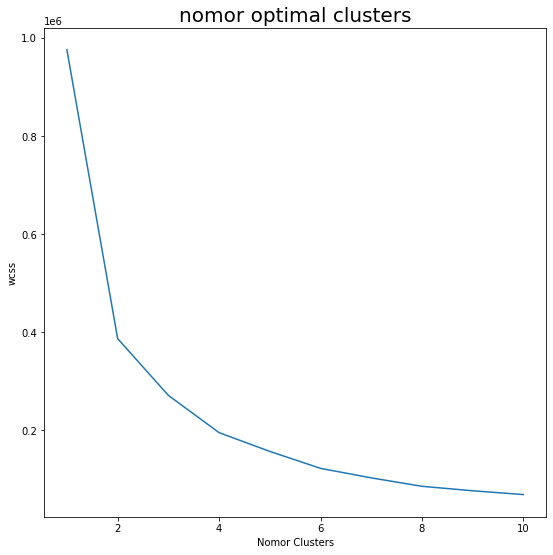

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('nomor optimal clusters', fontsize = 20)
plt.xlabel('Nomor Clusters')
plt.ylabel('wcss')
plt.show()

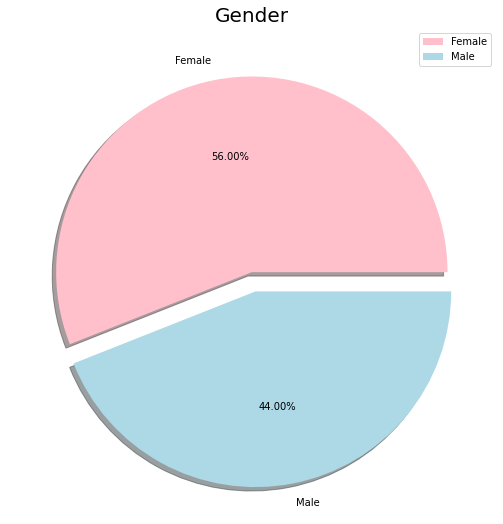

In [ ]:
labels = ['Female', 'Male']
size = df['Gender'].value_counts()
colors = ['pink', 'lightblue']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()